<class 'PIL.JpegImagePlugin.JpegImageFile'>


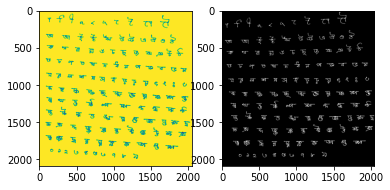

In [1]:
import cv2
from numpy import asarray
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
#input_file = sys.argv[1]
img = cv2.imread('A SCAN.jpg',0)
# convert to binary
ret,c2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('skew1.jpg', c2)
img = im.open('skew1.jpg')
print(type(img))
wd, ht = img.size
pix=asarray(img)
#pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
plt.imshow(bin_img, cmap='gray')
plt.savefig('binary.png')
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
delta = 0.1
limit = 40
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
#print('Best angle: {}'.formate(best_angle))
# correct skew
data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
img1 = im.fromarray((255 * data).astype("uint8")).convert("RGB")
img1.save('skew_corrected.jpg')
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(img1)
plt.show()

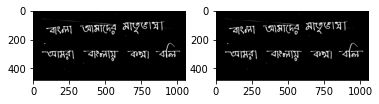

True

In [2]:
img = cv2.imread('skew_corrected.png')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
cv2.imwrite('denoised1.png', dst)